# Inspect ATAC part of vagal multiome data colleceted upon ovalbumin challenge

## 0. Imports

In [1]:
library(Seurat)
library(Signac)
library(GenomicFeatures)
library(EnsDb.Mmusculus.v79)
library(Rsamtools)
library(tidyverse)
library(viridis)
library(dplyr)
library(ggplot2)
library(ggpointdensity)
library(ggExtra)


options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

# Set plotting dims
options(repr.plot.width=10, repr.plot.height=7)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following obj

In [2]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /home/luoxingj/miniconda3/envs/single_cell/lib/libopenblasp-r0.3.29.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1             ggpointdensity_0.1.0      
 [3] viridis_0.6.5              viridisLite_0.4.2         
 [5] lubridate_1.9.3            forcats_1.0.0             
 [7] stri

## 1. Paths

In [3]:
master_data_dir = '/bap/bap/collab_asthma_multiome/'

In [4]:
# asthma multiome object
asthma_multiome_obj_path = file.path(master_data_dir, 'outputs/ATAC/1_Combined_Preprocessing_Outputs/', 'Asthma_Multiome_Combined_NeuronsOnly_Filtered.rds')

asthma_multiome_obj_path

[1] "/bap/bap/collab_asthma_multiome//outputs/ATAC/1_Combined_Preprocessing_Outputs//Asthma_Multiome_Combined_NeuronsOnly_Filtered.rds"

In [5]:
# Path to reference dataset
reference_data_path <- "/bap/bap/collab_asthma_multiome/AggregatedData_190717_v2.RData"

reference_data_path

[1] "/bap/bap/collab_asthma_multiome/AggregatedData_190717_v2.RData"

In [6]:
# output path
output_dir <- file.path(master_data_dir, "outputs", "ATAC", "1_Combined_Preprocessing_Outputs")

if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
}

## 2. Load object

In [7]:
multiome.combined.neurons <- readRDS(asthma_multiome_obj_path)

multiome.combined.neurons

An object of class Seurat 
362679 features across 7418 samples within 4 assays 
Active assay: RNA (32285 features, 2000 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, data.1, data.2, data.3, data.4, data.5, scale.data
 3 other assays present: ATAC, ACTIVITY, prediction.score.predicted_clusters
 6 dimensional reductions calculated: lsi, umap.atac, pca, umap, ref.pca, ref.umap

### 2.1 Visualize ATAC UMAP (with RNA-based label transfer)

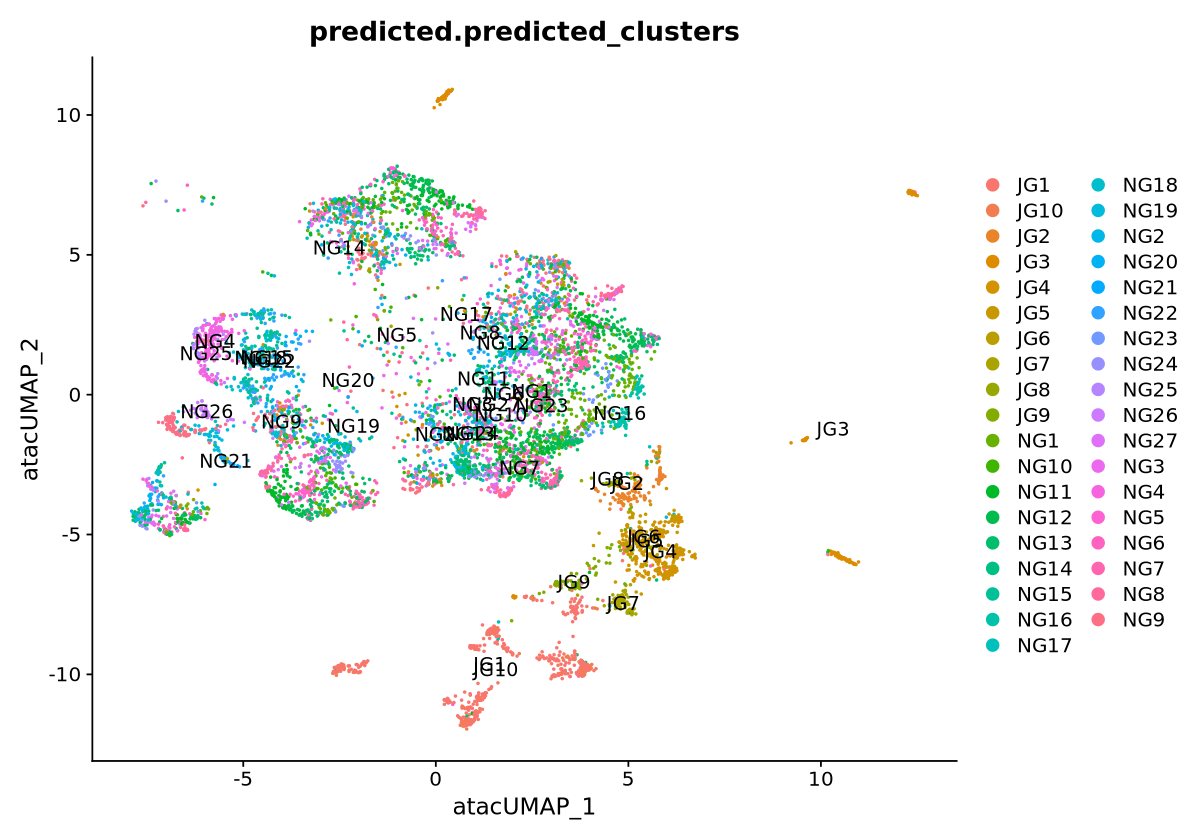

In [8]:
DimPlot(multiome.combined.neurons, group.by = "predicted.predicted_clusters",reduction = "umap.atac", label = T)

# END